In [80]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Flatten, Dense, Dropout
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [81]:
batch_size = 32

classes = ['apple', 'banana', 'cherry', 'grape', 'melon', 'orange', 'strawberry']
nb_classes = len(classes)

img_rows = 100
img_cols = 100
channels = 3

train_data_dir = './data/train'
validation_data_dir = './data/validation'

epochs = 50
steps_per_epoch = int(train_steps / epochs)

result_dir = './results'

In [82]:
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

In [83]:
input_tensor = Input(shape=(img_rows, img_cols, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

In [84]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [85]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(nb_classes, activation='softmax'))

In [86]:
top_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 1799      
Total params: 1,181,703
Trainable params: 1,181,703
Non-trainable params: 0
_________________________________________________________________


In [87]:
model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [88]:
model.layers[:15]

In [89]:
# 最後のconv層の直前までの層をfreeze
for layer in model.layers[:15]:
    layer.trainable = False

In [90]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [91]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,# シアー変換
    zoom_range=0.2, #  ランダムに　ズーム
    rotation_range=20, # ランダムな回転回転角度
    horizontal_flip=True, # 水平方向に反転
    vertical_flip=True # 垂直方向に反転
)

In [92]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [93]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

Found 4565 images belonging to 7 classes.
Found 697 images belonging to 7 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/50
142/142 [==============================] - 4139s - loss: 1.6312 - acc: 0.4029 - val_loss: 1.6539 - val_acc: 0.4062
Epoch 2/50
142/142 [==============================] - 803s - loss: 1.3352 - acc: 0.5475 - val_loss: 1.3881 - val_acc: 0.5233
Epoch 3/50
142/142 [==============================] - 965s - loss: 1.1651 - acc: 0.6069 - val_loss: 1.2037 - val_acc: 0.5759
Epoch 4/50
142/142 [==============================] - 1094s - loss: 1.0509 - acc: 0.6493 - val_loss: 1.1579 - val_acc: 0.6090
Epoch 5/50
142/142 [==============================] - 942s - loss: 0.9553 - acc: 0.6905 - val_loss: 1.0413 - val_acc: 0.6271
Epoch 6/50
142/142 [==============================] - 918s - loss: 0.8913 - acc: 0.7051 - val_loss: 1.0151 - val_acc: 0.6391
Epoch 7/50
142/142 [==============================] - 924s - loss: 0.8371 - acc: 0.7240 - val_loss: 1.0143 - val_acc: 0.6376
Epoch 8/50
136/142 [===========================>..] - ETA: 35s - loss: 0.7621 - acc: 0.7520

In [60]:
history.history

{'acc': [0.33770161290322581,
  0.4692540322580645,
  0.54181449587310082,
  0.58114919354838712,
  0.59655347217235,
  0.64516129032258063,
  0.67055245836676525,
  0.67439516129032262,
  0.69657258064516125,
  0.70400405482960671,
  0.73891129032258063,
  0.75012671077426651,
  0.76008064516129037,
  0.74708565660255299,
  0.765625,
  0.75,
  0.77749619877284026,
  0.77520161290322576,
  0.78205778009083082,
  0.78377016129032262,
  0.79118094287786278,
  0.79989919354838712,
  0.796875,
  0.81398884958865614,
  0.80645161290322576,
  0.83020780540273931,
  0.81502016129032262,
  0.82970096321197795,
  0.81905241935483875,
  0.82412569693847171,
  0.83165322580645162,
  0.83820564516129037,
  0.82919412077953536,
  0.84677419354838712,
  0.85453623938065038,
  0.85635080645161288,
  0.83933096815956099,
  0.858366935483871,
  0.84828629032258063,
  0.85453623941086054,
  0.84778225806451613,
  0.85250886983214091,
  0.85282258064516125,
  0.86365940207705183,
  0.86643145161290325,
 

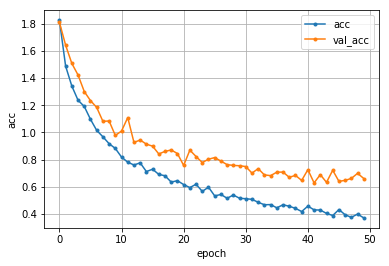

In [59]:
# plot results
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

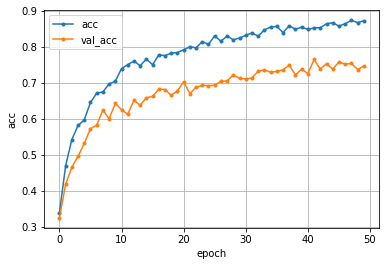

In [61]:
# plot results
loss = history.history['acc']
val_loss = history.history['val_acc']

plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [64]:
import pickle

In [65]:
with open('./results/history1.pkl', mode='wb') as f:
    pickle.dump('Hello, World!', f)